# Topic Modeling

In [ ]:
# 맥락과 관련된 단어 

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !pip install gensim

## 전처리

In [83]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

In [84]:
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_f = "Big data is a term used to refer to data sets that are too large or complex for traditional data-processing application software to adequately deal with."
doc_g = "Data with many cases offer greater statistical power, while data with higher complexity may lead to a higher false discovery rate"
doc_h = "Big data was originally associated with three key concepts: volume, variety, and velocity."
doc_i = "A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity and variety to require specific technology and analytical methods for its transformation into value'."
doc_j = "Data must be processed with advanced tools to reveal meaningful information."

In [85]:
tokenizer = RegexpTokenizer('[\w]+')

In [86]:
stop_words = stopwords.words('english')

In [87]:
p_stemmer = PorterStemmer() # 어근 추출.. : runs, running, ran => run

In [88]:
# topics - keywords를 기준으로 keywords의 빈도(중요돌)를 계산해서 문서의 유사도

# 1. health
# 2. food
# 3. bigdata
# 4. drive
# 5. data

In [89]:
doc_set = [doc_a,doc_b,doc_c,doc_d,doc_e,doc_f,doc_g,doc_h,doc_i,doc_j]

In [91]:
# 문장에서 토큰나이징, stopword제외, 어근추출 전처리
texts=[]
for w in doc_set:
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if i not in stop_words]
    stemmer_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmer_tokens)

### 분석할 text

In [92]:
texts

[['brocolli',
  'good',
  'eat',
  'brother',
  'like',
  'eat',
  'good',
  'brocolli',
  'mother'],
 ['mother',
  'spend',
  'lot',
  'time',
  'drive',
  'brother',
  'around',
  'basebal',
  'practic'],
 ['health',
  'expert',
  'suggest',
  'drive',
  'may',
  'caus',
  'increas',
  'tension',
  'blood',
  'pressur'],
 ['often',
  'feel',
  'pressur',
  'perform',
  'well',
  'school',
  'mother',
  'never',
  'seem',
  'drive',
  'brother',
  'better'],
 ['health', 'profession', 'say', 'brocolli', 'good', 'health'],
 ['big',
  'data',
  'term',
  'use',
  'refer',
  'data',
  'set',
  'larg',
  'complex',
  'tradit',
  'data',
  'process',
  'applic',
  'softwar',
  'adequ',
  'deal'],
 ['data',
  'mani',
  'case',
  'offer',
  'greater',
  'statist',
  'power',
  'data',
  'higher',
  'complex',
  'may',
  'lead',
  'higher',
  'fals',
  'discoveri',
  'rate'],
 ['big',
  'data',
  'origin',
  'associ',
  'three',
  'key',
  'concept',
  'volum',
  'varieti',
  'veloc'],
 ['2016

## gensim-corpora 를 통한 dictionary 만들기

In [93]:
from gensim import corpora, models
import gensim

In [94]:
# Dictionary : token에 index를 붙여서 사전을 만든다
dictionary = corpora.Dictionary(texts) 

In [95]:
for w in dictionary.items():
    print(w)

(0, 'brocolli')
(1, 'brother')
(2, 'eat')
(3, 'good')
(4, 'like')
(5, 'mother')
(6, 'around')
(7, 'basebal')
(8, 'drive')
(9, 'lot')
(10, 'practic')
(11, 'spend')
(12, 'time')
(13, 'blood')
(14, 'caus')
(15, 'expert')
(16, 'health')
(17, 'increas')
(18, 'may')
(19, 'pressur')
(20, 'suggest')
(21, 'tension')
(22, 'better')
(23, 'feel')
(24, 'never')
(25, 'often')
(26, 'perform')
(27, 'school')
(28, 'seem')
(29, 'well')
(30, 'profession')
(31, 'say')
(32, 'adequ')
(33, 'applic')
(34, 'big')
(35, 'complex')
(36, 'data')
(37, 'deal')
(38, 'larg')
(39, 'process')
(40, 'refer')
(41, 'set')
(42, 'softwar')
(43, 'term')
(44, 'tradit')
(45, 'use')
(46, 'case')
(47, 'discoveri')
(48, 'fals')
(49, 'greater')
(50, 'higher')
(51, 'lead')
(52, 'mani')
(53, 'offer')
(54, 'power')
(55, 'rate')
(56, 'statist')
(57, 'associ')
(58, 'concept')
(59, 'key')
(60, 'origin')
(61, 'three')
(62, 'varieti')
(63, 'veloc')
(64, 'volum')
(65, '2016')
(66, 'analyt')
(67, 'asset')
(68, 'character')
(69, 'definit')
(70

In [96]:
texts[1]

['mother',
 'spend',
 'lot',
 'time',
 'drive',
 'brother',
 'around',
 'basebal',
 'practic']

In [97]:
np.unique(np.array(texts[1]))

array(['around', 'basebal', 'brother', 'drive', 'lot', 'mother',
       'practic', 'spend', 'time'], dtype='<U7')

In [98]:
# token의 등장횟수를 tuple로 반환
# 인덱싱은 dictionary 기준

dictionary.doc2bow(texts[1]) 

[(1, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]

In [ ]:
dictionary.token2id

In [99]:
# corpus : 텍스트 분석 연산에 용이하게 만든 데이터 집합(발생빈도수)
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1)],
 [(1, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(8, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(1, 1),
  (5, 1),
  (8, 1),
  (19, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(0, 1), (3, 1), (16, 2), (30, 1), (31, 1)],
 [(32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1)],
 [(18, 1),
  (35, 1),
  (36, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1)],
 [(34, 1),
  (36, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(34, 1),
  (36, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),

## gensim.models 를 통한 LDAModel

### ldamodel이란? 


In [100]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word= dictionary) 

In [101]:
# print_topics 함수
ldamodel.print_topics(num_words=7)  # topic별 중요 token

[(0,
  '0.046*"data" + 0.038*"health" + 0.037*"higher" + 0.022*"good" + 0.022*"brocolli" + 0.022*"profession" + 0.021*"say"'),
 (1,
  '0.042*"drive" + 0.029*"data" + 0.029*"pressur" + 0.028*"mother" + 0.028*"brother" + 0.020*"may" + 0.020*"inform"'),
 (2,
  '0.059*"data" + 0.033*"brocolli" + 0.033*"good" + 0.032*"eat" + 0.031*"big" + 0.024*"brother" + 0.024*"mother"')]

## get_documnet_topics 함수로 토픽 예측

In [102]:
ldamodel.get_document_topics(corpus)[0] # 1번토픽에 가깝다

[(0, 0.0347162), (1, 0.03485127), (2, 0.9304325)]

In [103]:
ldamodel.get_document_topics(corpus)[1]

[(0, 0.03358508), (1, 0.93190616), (2, 0.034508754)]

In [104]:
for d in ldamodel.get_document_topics(corpus):
    print(d)

[(0, 0.0347176), (1, 0.034851823), (2, 0.9304306)]
[(0, 0.03358509), (1, 0.9319037), (2, 0.034511194)]
[(0, 0.03209253), (1, 0.93728864), (2, 0.030618839)]
[(0, 0.025936829), (1, 0.9457096), (2, 0.028353598)]
[(0, 0.8976828), (1, 0.048891682), (2, 0.053425487)]
[(0, 0.020422248), (1, 0.020177756), (2, 0.9594)]
[(0, 0.95941156), (1, 0.02020002), (2, 0.020388437)]
[(0, 0.03247646), (1, 0.034040645), (2, 0.9334829)]
[(0, 0.9639846), (1, 0.016760997), (2, 0.019254401)]
[(0, 0.039008338), (1, 0.9208079), (2, 0.040183753)]


## LDA 시각화

In [119]:
# !pip install pyLDAvis

In [ ]:
# https://wikidocs.net/30708

# 좌측의 원들은 각각의 20개의 토픽을 나타냅니다. 각 원과의 거리는 각 토픽들이 서로 얼마나 다른지를 보여줍니다. 
# 만약 두 개의 원이 겹친다면, 이 두 개의 토픽은 유사한 토픽이라는 의미입니다. 위의 그림에서는 10번 토픽을 클릭하였고, 
# 이에 따라 우측에는 10번 토픽에 대한 정보가 나타납니다. 
# 한 가지 주의할 점은 LDA 모델의 출력 결과에서는 토픽 번호가 0부터 할당되어 0~19의 숫자가 사용된 것과는 달리 
# 위의 LDA 시각화에서는 토픽의 번호가 1부터 시작하므로 각 토픽 번호는 이제 +1이 된 값인 1~20까지의 값을 가집니다.

In [120]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\bitcamp\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


## LDA Topic modeling : perplexity

* perplexity(혼란)<br>
 문헌 내 주제 출현확률과 주제 내 용어출현 확률
* 값이 낮을수록 분류가 잘됬다는 뜻

In [109]:
print(ldamodel.log_perplexity(corpus))

-5.471927107408129


In [112]:
# 주제 개수에 따른 perplexity값들

perplexity_values = []

for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i,id2word=dictionary) # ldamodel객체
    perplexity_values.append(ldamodel.log_perplexity(corpus))

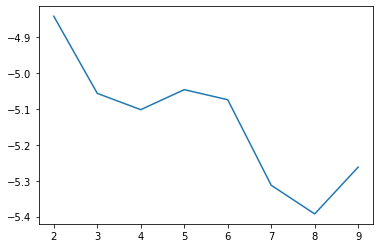

In [113]:
plt.plot(range(2,10),perplexity_values)

## LDA Topic modeling : coherence
* coherence<br>
 해당 주제가 의미론적으로 일치하는 단어들끼리 모여있는 지 
* 높을수록 분류가 잘됨

In [ ]:
from gensim.models import CoherenceModel

In [117]:
texts[:2]

[['brocolli',
  'good',
  'eat',
  'brother',
  'like',
  'eat',
  'good',
  'brocolli',
  'mother'],
 ['mother',
  'spend',
  'lot',
  'time',
  'drive',
  'brother',
  'around',
  'basebal',
  'practic']]

In [77]:
coherence_values = []

for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=i,id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts= texts, dictionary= dictionary,topn=10) # 
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

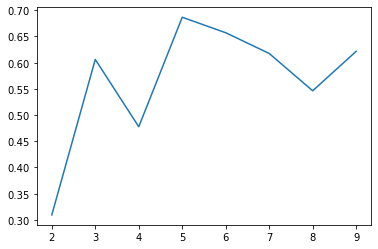

In [78]:
plt.plot(range(2,10), coherence_values)